In [ ]:
# '''
# Authors:
#     Joanna Niedziałek
#     Karolina Dębowska
# '''

In [1]:
pip install pydub

Note: you may need to restart the kernel to use updated packages.


In [4]:
import wave
from pydub import AudioSegment as auds
import pandas as pd
import numpy as np
import os, fnmatch
from matplotlib import pyplot as plt
import scipy.io.wavfile as wf
from scipy.integrate import simps

In [6]:
# Sciezka
path = 'C:/<WLASNA SCIEZKA>/Nagrania'

# Wyciaganie nazw plikow ze sciezki
list_of_files = os.listdir(path)
pattern = "*.txt"
list_of_names = []
for entry in list_of_files:
    if fnmatch.fnmatch(entry, pattern):
            list_of_names.append(entry[:-4])

# Utworzenie list plikow wav i txt
files_wav_list = []
files_txt_list = []
for filename in list_of_names:
    files_wav_list.append(filename + '.wav')
    files_txt_list.append(filename + '.txt')
    
print('Obecne pliki:')

for i in range(len(list_of_names)):
    print(files_txt_list[i], files_wav_list[i])
print('liczba plikow: ', len(list_of_names))

Obecne pliki:
289516_25_K_01_2.txt 289516_25_K_01_2.wav
289516_25_K_10_3.txt 289516_25_K_10_3.wav
289516_25_K_16_4.txt 289516_25_K_16_4.wav
289516_25_K_22_1.txt 289516_25_K_22_1.wav
289540_23_K_13_2.txt 289540_23_K_13_2.wav
289540_23_K_18_3.txt 289540_23_K_18_3.wav
289540_23_K_22_4.txt 289540_23_K_22_4.wav
289540_23_K_9_1.txt 289540_23_K_9_1.wav
289550_23_K_18_2.txt 289550_23_K_18_2.wav
289550_23_K_23_3.txt 289550_23_K_23_3.wav
289550_23_K_23_4.txt 289550_23_K_23_4.wav
289550_23_K_9_1.txt 289550_23_K_9_1.wav
289556_24_K_11_1.txt 289556_24_K_11_1.wav
289556_24_K_15_2.txt 289556_24_K_15_2.wav
289556_24_K_19_3.txt 289556_24_K_19_3.wav
289556_24_K_23_4.txt 289556_24_K_23_4.wav
289592_24_K_12_1.txt 289592_24_K_12_1.wav
289592_24_K_15_2.txt 289592_24_K_15_2.wav
289592_24_K_19_3.txt 289592_24_K_19_3.wav
289592_24_K_7_4.txt 289592_24_K_7_4.wav
404907_23_K_11_1.txt 404907_23_K_11_1.wav
404907_23_K_14_2.txt 404907_23_K_14_2.wav
404907_23_K_16_3.txt 404907_23_K_16_3.wav
404907_23_K_20_4.txt 40490

In [179]:
# Wybor pliku
nr = 6
filename = list_of_names[nr]
file_wav = files_wav_list[nr]
file_txt = files_txt_list[nr]
print(file_wav, file_txt)

289540_23_K_22_4.wav 289540_23_K_22_4.txt


In [180]:
# Wczytywanie plikow z etykietami
textfile = pd.read_csv(path + '/' + file_txt, sep = '\t', header = None)

In [181]:
# Poprawianie etykiet
labels = []
for i in range(0,100):
    labels.append(str(textfile[2][i]))
    if labels[i] == 'nan':
        labels[i] = 'NA'
    labels[i] = labels[i].upper()      # Jesli sa male litery to zamienia na duze
#     print(labels[i])

Z nagrania: 289540_23_K_22_4


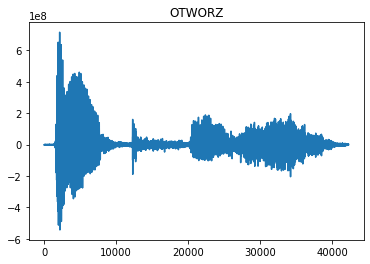

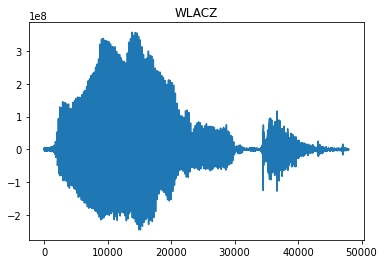

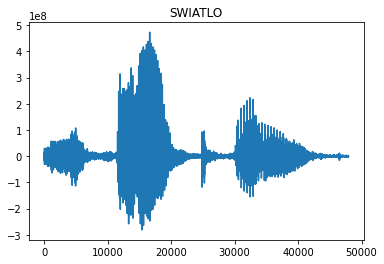

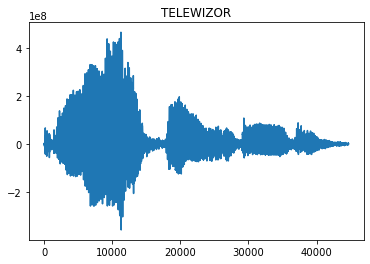

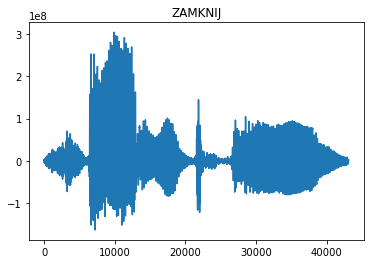

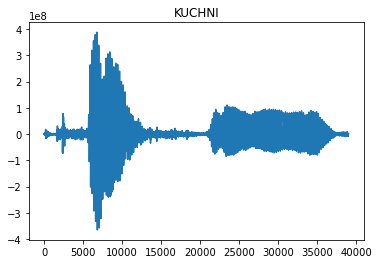

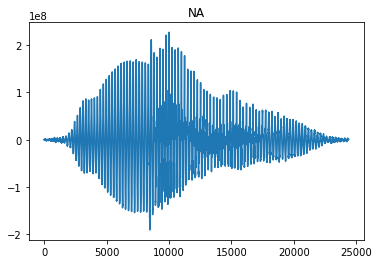

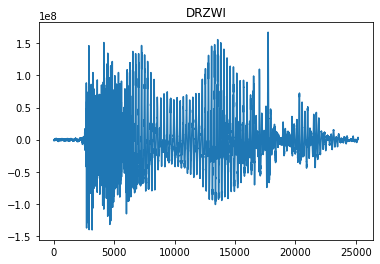

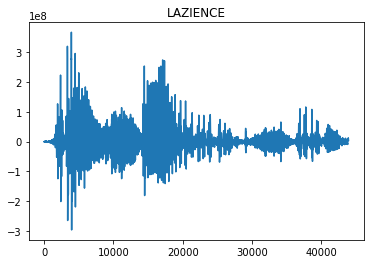

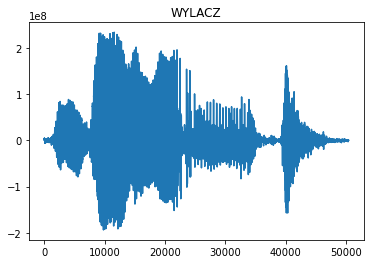

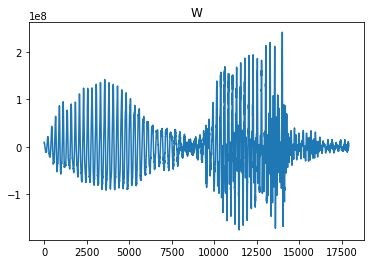

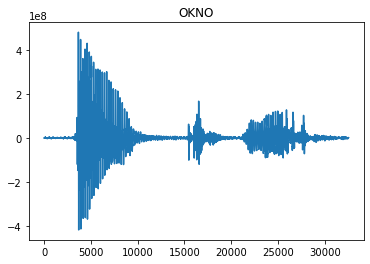

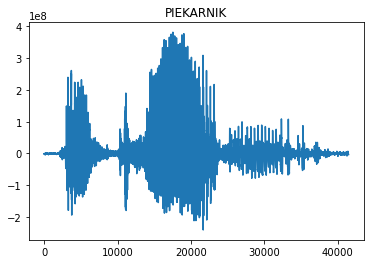

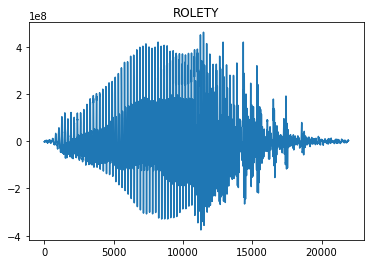

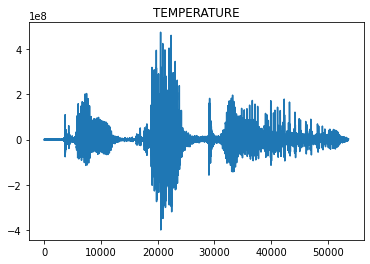

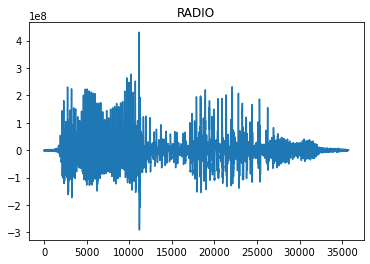

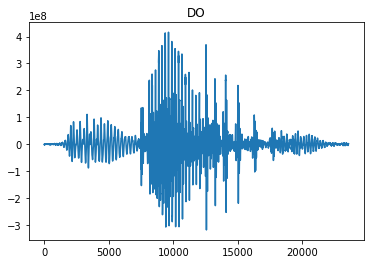

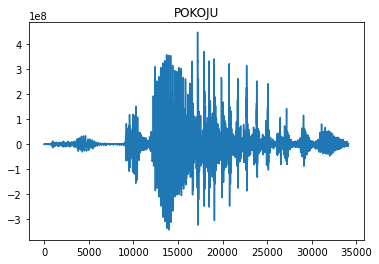

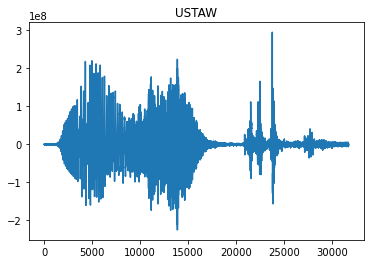

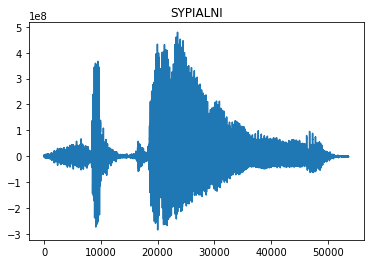

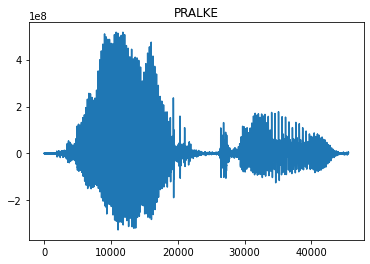

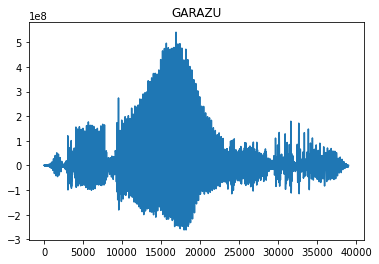

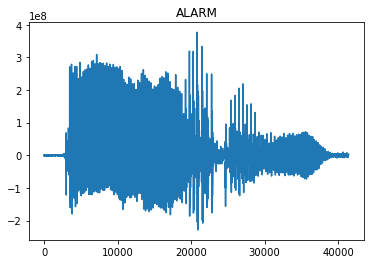

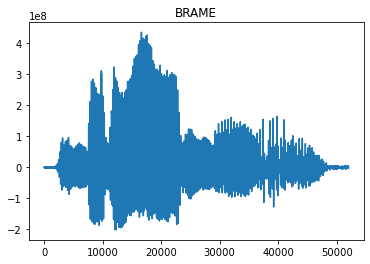

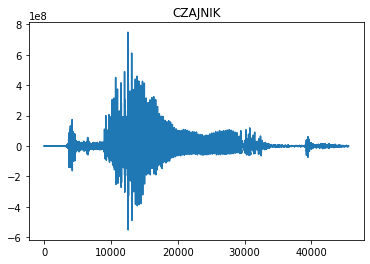

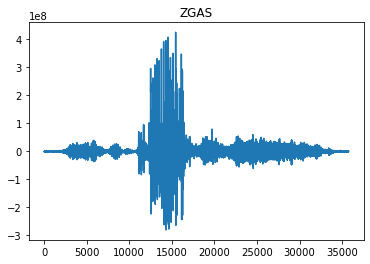

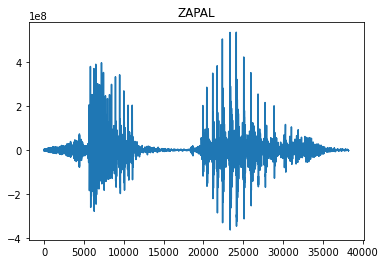

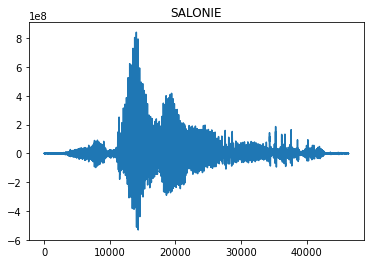

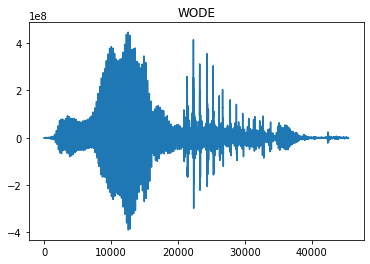

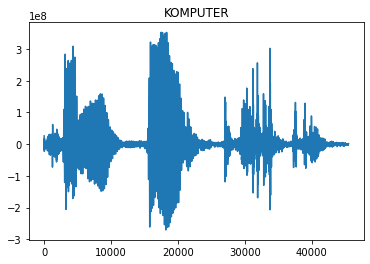

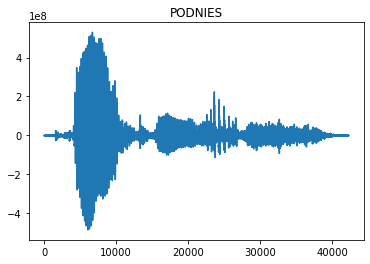

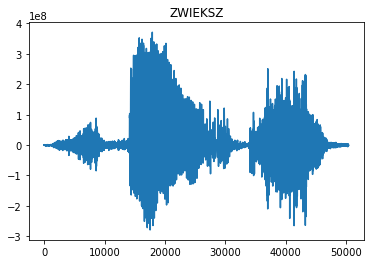

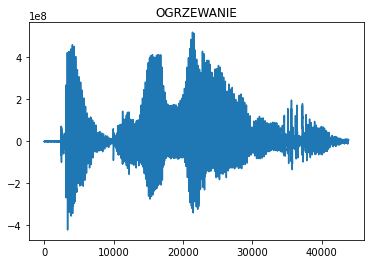

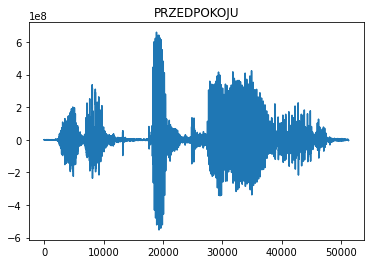

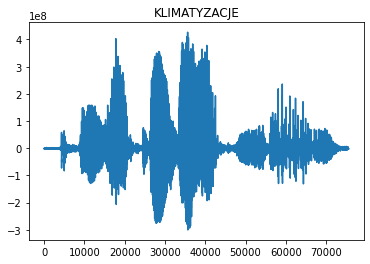

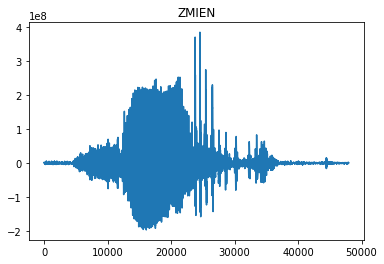

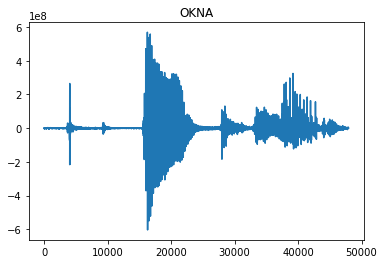

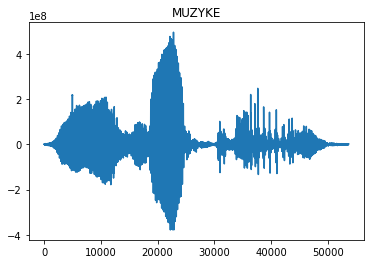

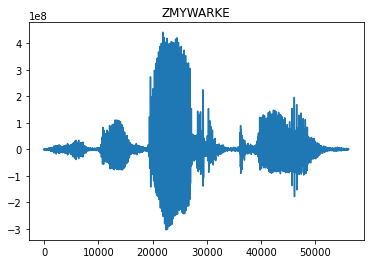

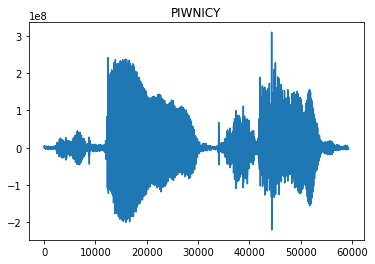

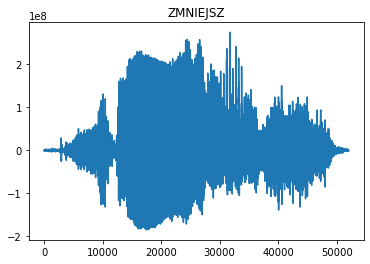

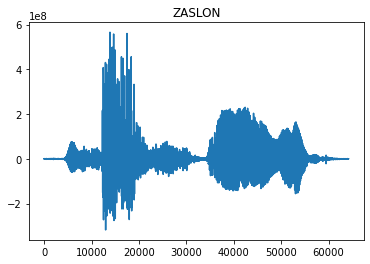

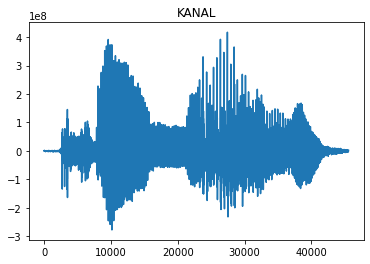

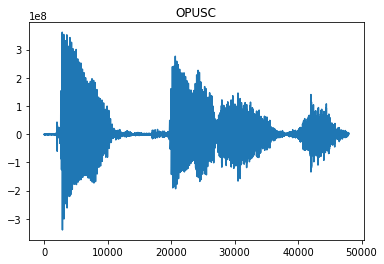

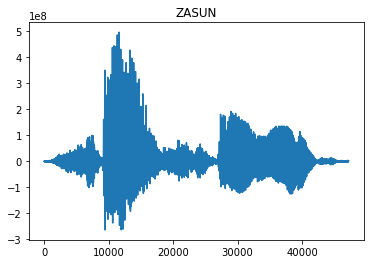

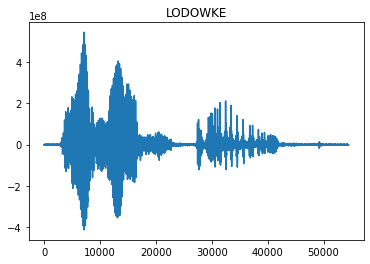

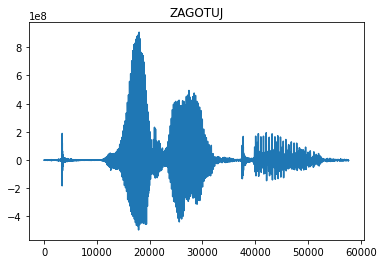

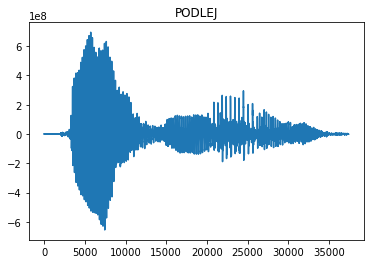

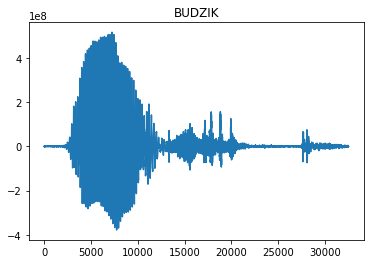

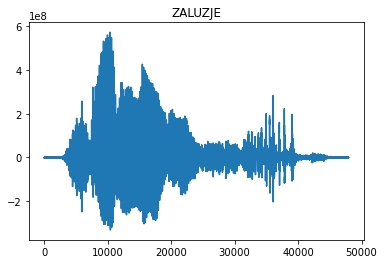

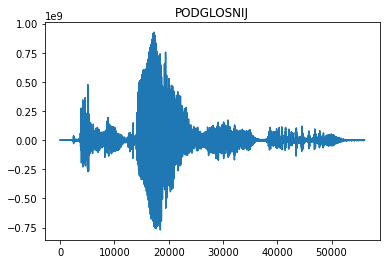

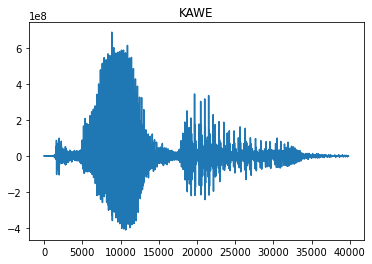

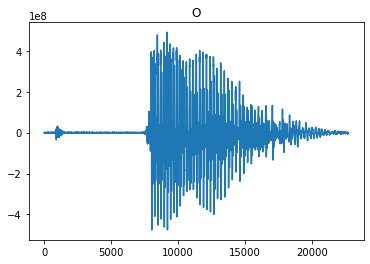

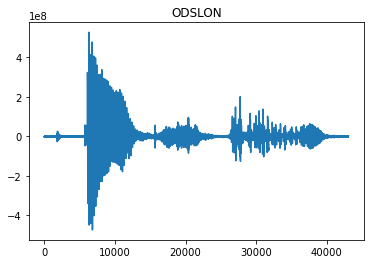

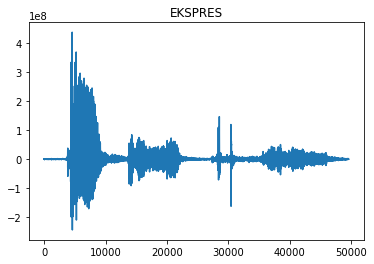

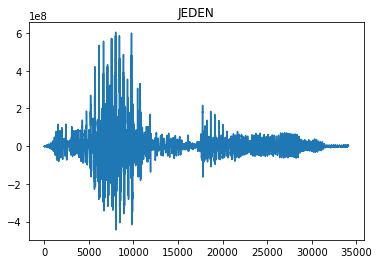

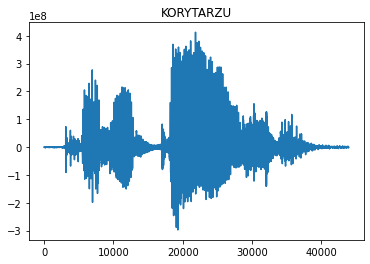

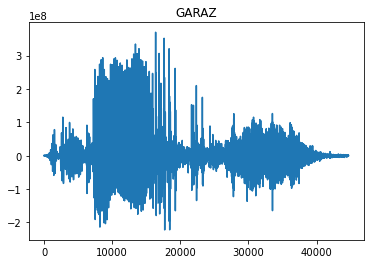

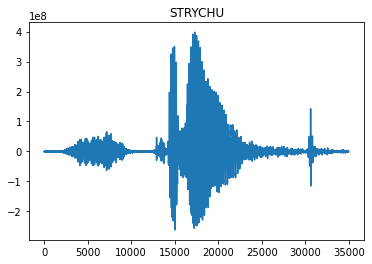

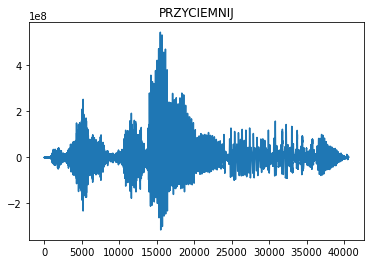

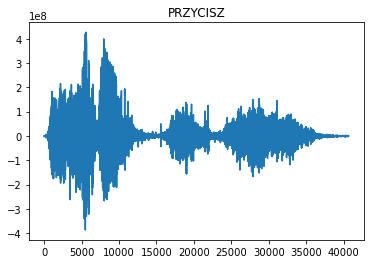

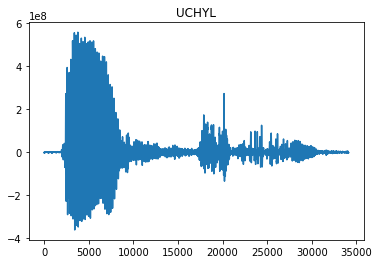

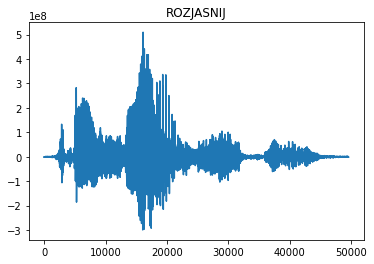

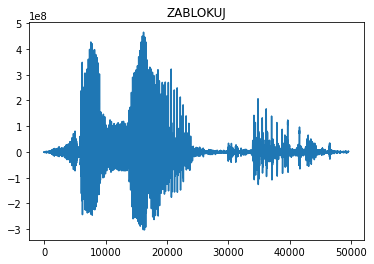

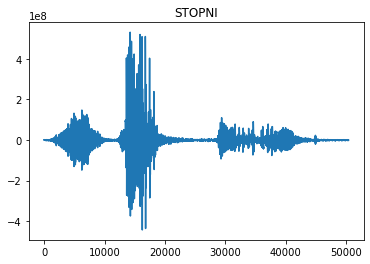

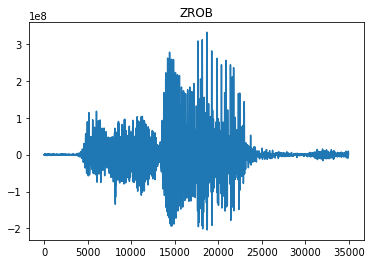

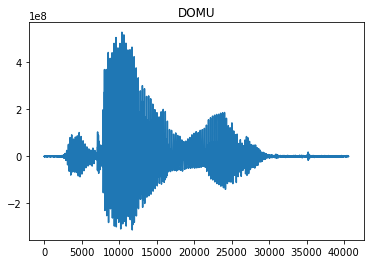

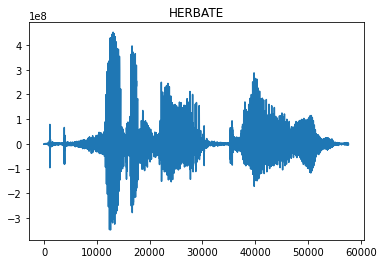

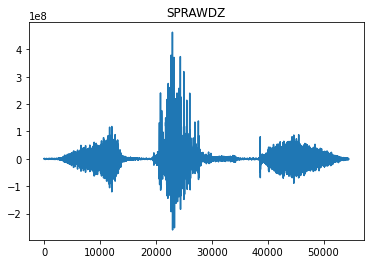

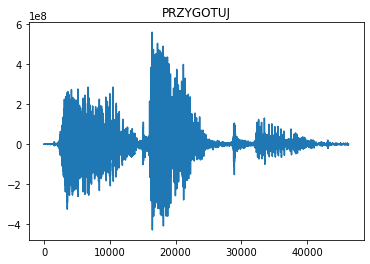

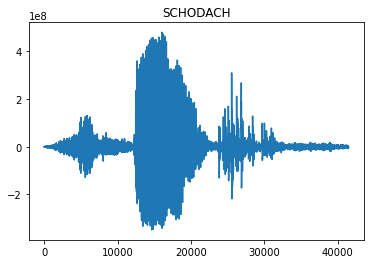

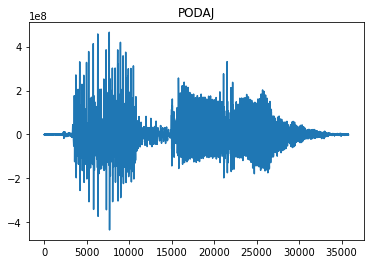

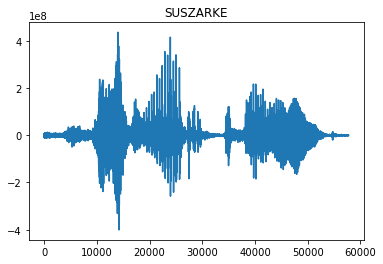

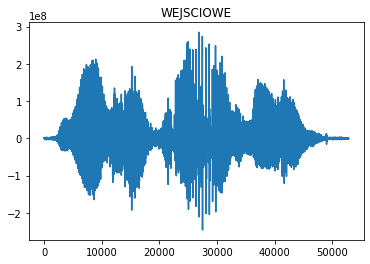

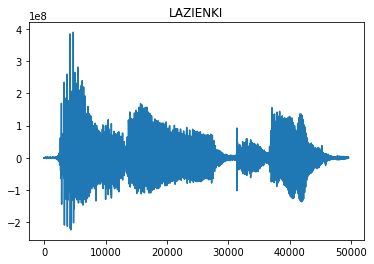

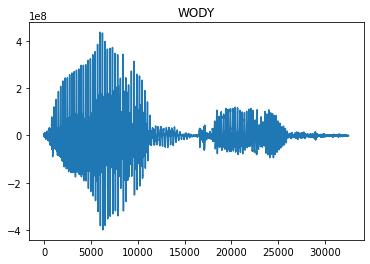

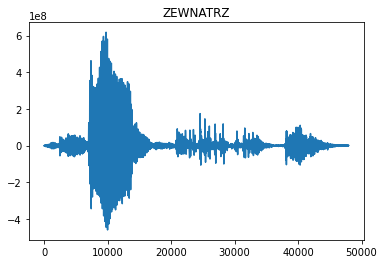

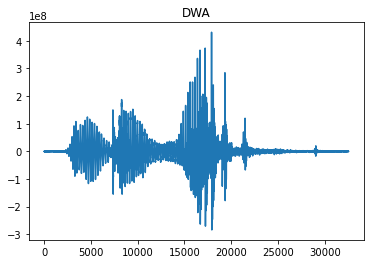

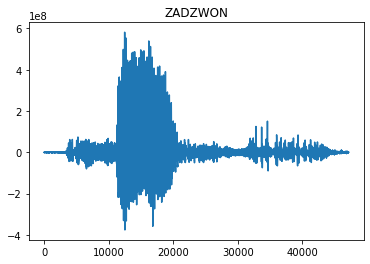

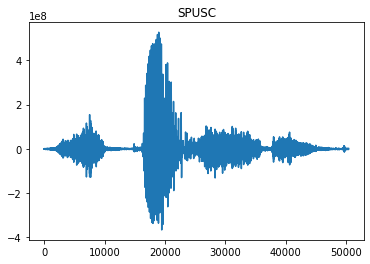

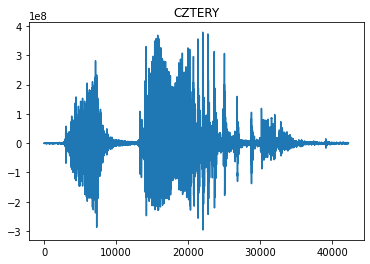

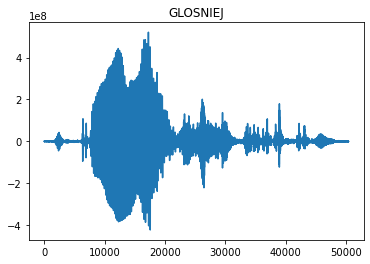

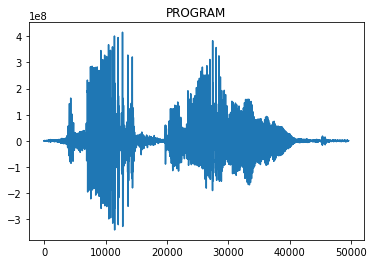

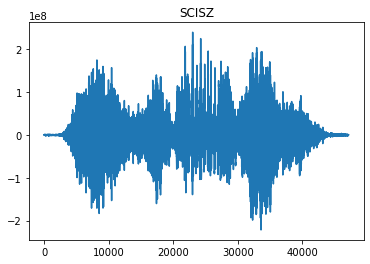

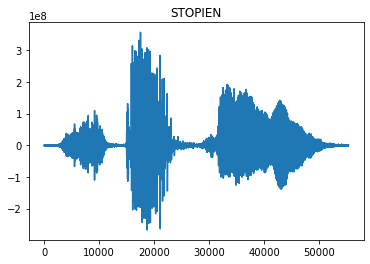

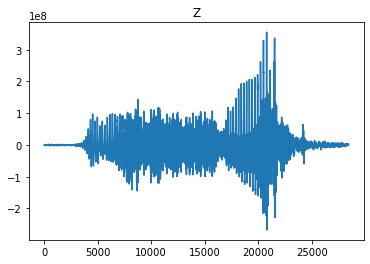

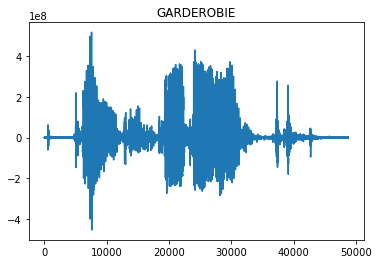

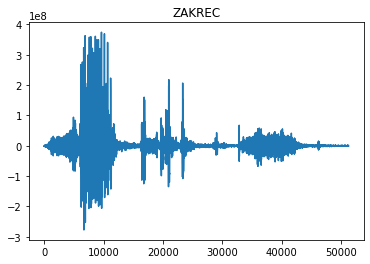

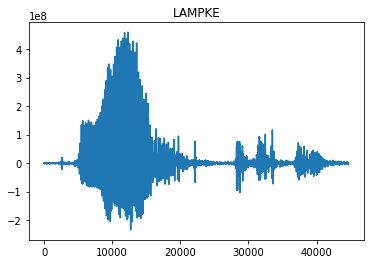

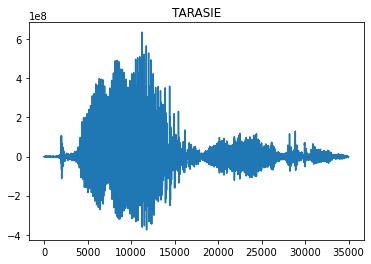

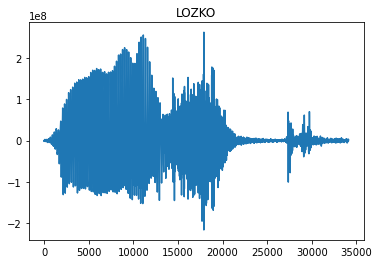

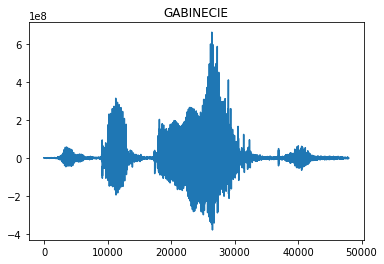

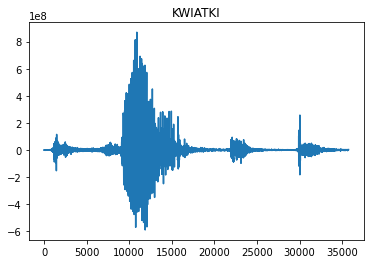

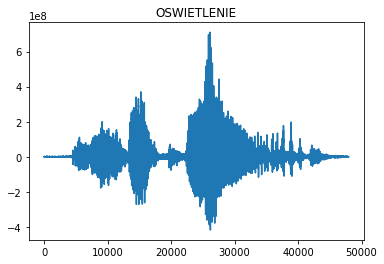

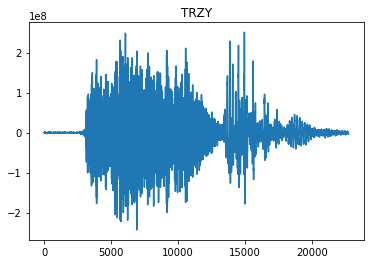

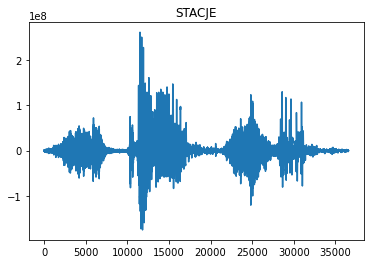

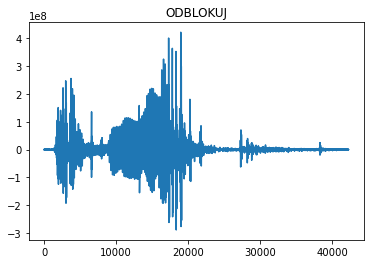

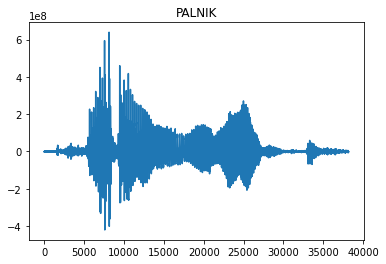

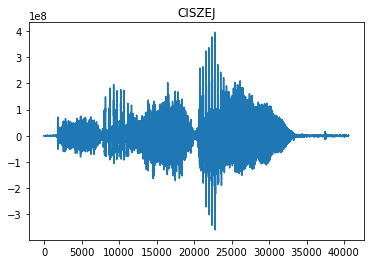

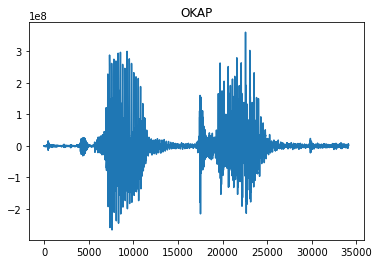

In [182]:
# Wyświetlanie wszystkich słów z jednego nagrania 
osoba = []
print("Z nagrania:", filename)
for i in range(0, 100):
    word_path = path + '/' + labels[i]
    # Sprawdź, czy istnieje plik o danej nazwie
    if os.path.isfile(word_path + '/' + filename + '_' + '{0}.wav'.format(labels[i])) == True:
        new_filename = filename + '_' + labels[i] + '.wav'
        word = wave.open(word_path + '/' + new_filename, 'rb')
        # Jeśli ilość ramek nieparzysta, to nie zadziała, więc wtedy wczytujemy wszystkie ramki oprócz ostatniej
        if word.getnframes() % 2 != 0:
            word_frames = word.readframes(word.getnframes()-1)
        else:
            word_frames = word.readframes(word.getnframes())
        word_frames = np.frombuffer(word_frames, dtype=int)
        osoba.append(word_frames)
        plt.figure()
        plt.plot(word_frames)
        plt.title(labels[i])
        plt.show()

Słowo: LOZKO


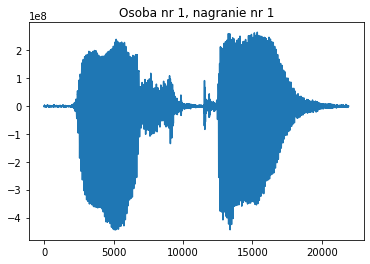

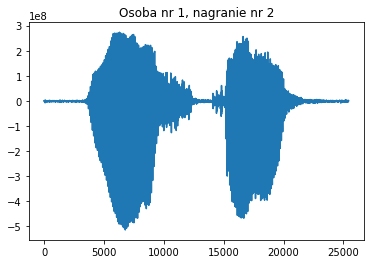

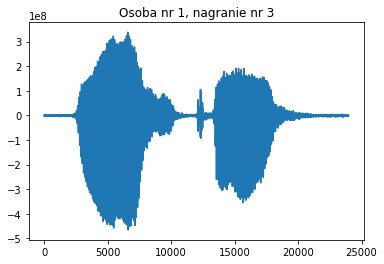

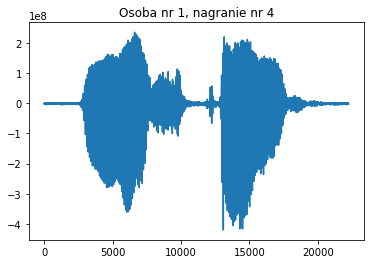

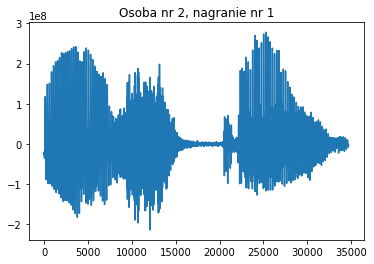

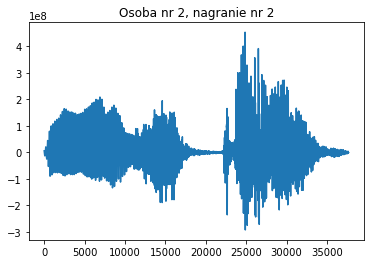

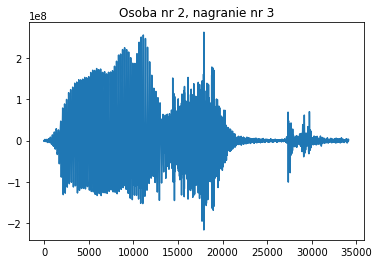

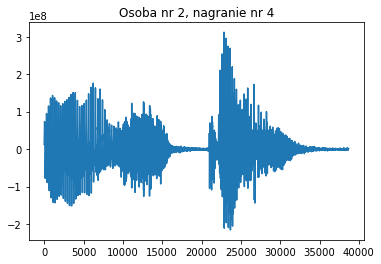

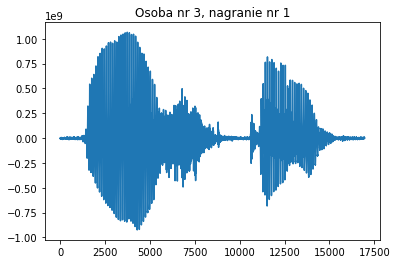

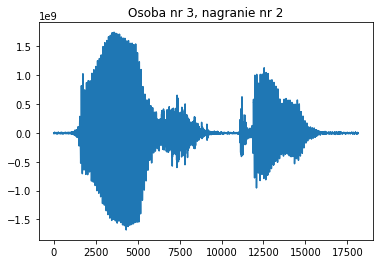

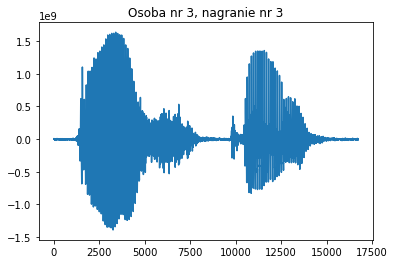

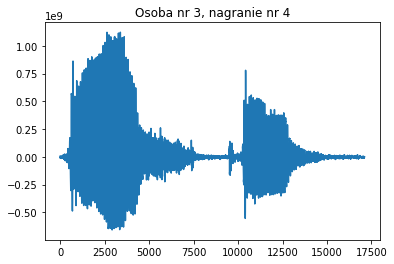

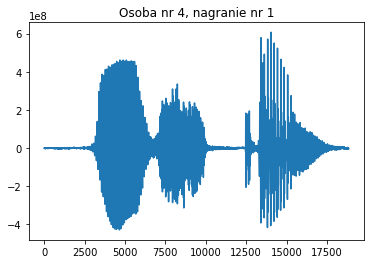

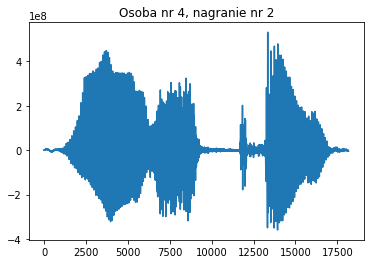

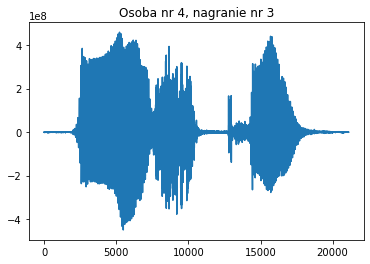

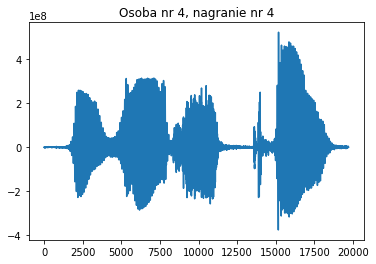

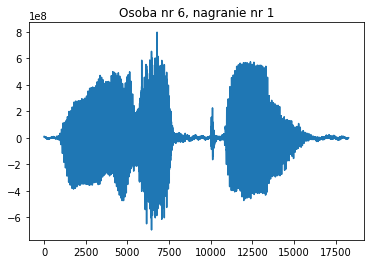

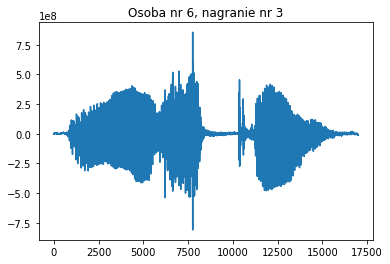

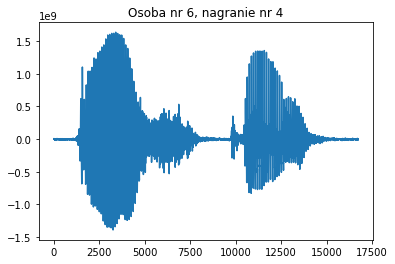

In [183]:
# Wyświetlanie wszystkich wersji danego słowa
nr_slowa = 90 # wybierz spośród [0, 99]
word_path = path + '/' + labels[nr_slowa]
slowa = []
print("Słowo:", labels[nr_slowa])
for i in range(0, len(list_of_names)):
    person_filename = list_of_names[i]
    person_file_wav = files_wav_list[i]
    person_file_txt = files_txt_list[i]
    if os.path.isfile(word_path + '/' + person_filename + '_' + '{0}.wav'.format(labels[nr_slowa])) == True:
        new_filename = person_filename + '_' + labels[nr_slowa] + '.wav'
        person = wave.open(word_path + '/' + new_filename, 'rb')
        # Jeśli ilość ramek nieparzysta, to nie zadziała, więc wtedy wczytujemy wszystkie ramki oprócz ostatniej
        if person.getnframes() % 2 != 0:
            person_frames = person.readframes(person.getnframes()-1)
        else:
            person_frames = person.readframes(person.getnframes())
        person_frames = np.frombuffer(person_frames, dtype=int)
        slowa.append(person_frames)
        plt.figure()
        plt.plot(person_frames)
        text = "Osoba nr " + str(int(i / 4 + 1)) + ", nagranie nr " + str(int(i % 4 + 1))
        plt.title(text)
        plt.show()

In [230]:
# Parametr: pole powierzchni pod krzywą z wartości bezwzględnej sygnału
# Wszystkie słowa danej osoby
folder_name = path + '/' + 'Area_osoby' + '/'
if os.path.isdir(folder_name) == False:
    os.mkdir(folder_name)
print('Pierwsze 5 plików:')
for j in range(len(list_of_names)):
    area_person = []
    for i in range(len(osoba)): # iteracja po kolejnych słowach
        area_person.append(simps(np.abs(osoba[i])))
# Zapis wartości do pliku tekstowego
    txt_person_filename = folder_name + 'area_' + list_of_names[j] + '.txt'
    if os.path.isfile(txt_person_filename) == False:
        np.savetxt(txt_person_filename, area_person)
        if j < 5:
            print(j+1, 'Zapisano jako:', txt_word_filename)
    elif os.path.isfile(txt_person_filename) == True and j < 5:
        print('Plik', list_of_names[j], 'już istnieje') 

Pierwsze 5 plików:
Plik 289516_25_K_01_2 już istnieje
Plik 289516_25_K_10_3 już istnieje
Plik 289516_25_K_16_4 już istnieje
Plik 289516_25_K_22_1 już istnieje
Plik 289540_23_K_13_2 już istnieje


In [229]:
# Parametr: pole powierzchni pod krzywą z wartości bezwzględnej sygnału
# Wszystkie pliki z danym słowem
folder_name = path + '/' + 'Area_slowa' + '/'
if os.path.isdir(folder_name) == False:
    os.mkdir(folder_name)
print("Pierwsze 5 plików:")
for j in range(len(osoba)):
    area_word = []
    for i in range(len(slowa)):
        area_word.append(simps(np.abs(slowa[i])))
# Zapis wartości do pliku tekstowego
    txt_word_filename = folder_name + 'area_' + labels[j] + '.txt'
    if os.path.isfile(txt_word_filename) == False:
        np.savetxt(txt_word_filename, area_word)
        if j < 5:
            print(j+1, 'Zapisano jako:', txt_word_filename)
    elif os.path.isfile(txt_word_filename) == True and j < 5:
        print('Plik', labels[j], 'już istnieje') 

Pierwsze 5 plików:
Plik OTWORZ już istnieje
Plik WLACZ już istnieje
Plik SWIATLO już istnieje
Plik TELEWIZOR już istnieje
Plik ZAMKNIJ już istnieje
